<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/7RO/UT1/T1/7R0_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Modifica el código usando los datos del archivo adjunto y muestra los puntos junto con la recta de regresión usando el modelo de scikit-learn.

\begin{array}{|c|c|} \hline
restaurante & x_i & y_i \\ \hline
1 & 2 & 58 \\ \hline
2 & 6 & 105 \\ \hline
3 & 8 & 88 \\ \hline
4 & 8 & 118 \\ \hline
5 & 12 & 117 \\ \hline
6 & 16 & 137 \\ \hline
7 & 20 & 157 \\ \hline
8 & 20 & 169 \\ \hline
9 & 22 & 149 \\ \hline
10 & 26 & 202 \\ \hline
\end{array}

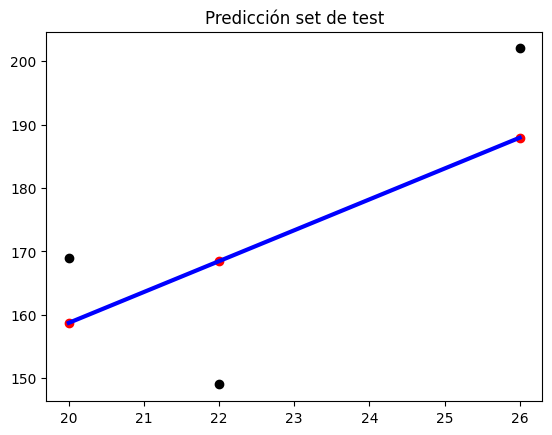

In [ ]:
#Se importan librerías
from re import X
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Parametrizamos el número de datos usado para test
test_points = 3

#Creamos el dataframe
matrix = np.array([np.arange(1,11),[2,6,8,8,12,16,20,20,22,26],[58,105,88,118,117,137,157,169,149,202]]).T

# Dividimos los datos en muestras de entranamiento y de test
X = matrix[:,1].reshape(-1, 1)
X_train = X[:-test_points]
X_test = X[-test_points:]
y = matrix[:,2]
y_train = y[:-test_points]
y_test = y[-test_points:]

# Creamos instancia de regresión lineal
regr = linear_model.LinearRegression()
# Entrenamos el modelo con el set de datos de entrenamiento
regr.fit(X_train, y_train)
# Realizamos las predicciones sobre el set de test
y_pred_test = regr.predict(X_test)

# Plot outputs
plt.title("Predicción set de test")
plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test, y_pred_test, color="red")
plt.plot(X_test, y_pred_test, color="blue", linewidth=3)
plt.show()


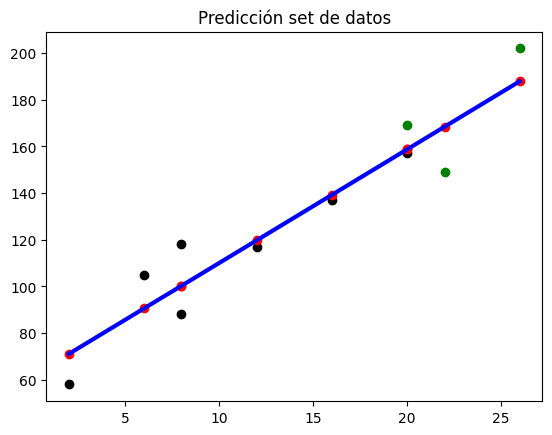

In [ ]:
# Reptimos la predicción para el set de datos completo
y_pred_all = regr.predict(X)

plt.title("Predicción set de datos")
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="green")
plt.scatter(X, y_pred_all, color="red")
plt.plot(X, y_pred_all, color="blue", linewidth=3)
plt.show()

2. Calcula la recta de regresión usando las fórmulas y dibújala con matplotlib:

Siendo b0 y b1:

$$ b1 = \frac{\sum x_{i}y_{i} - \frac{\sum x_{i}\sum y_{i}}{n}}{\sum x_{i}^{2}-\frac{(\sum x_{i})^{2}}{n}}\;\;que\;tambi\acute{e}n\;es\;\;b1 = \frac{\sum (x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum (x_{i}-\overline{x})^{2}}=\frac{s_{xy}}{s_{x}^{2}} $$

$$ b0 = \overline{y} - b_{1}\overline{x} $$

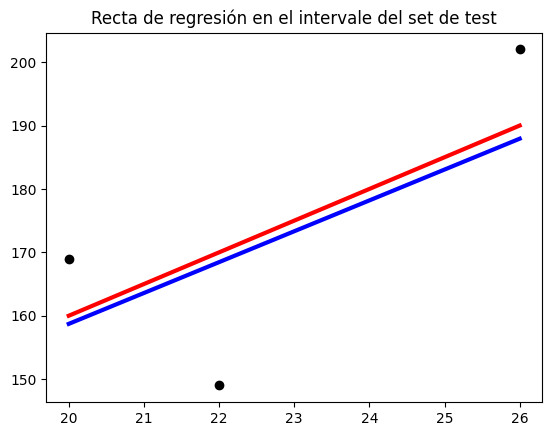

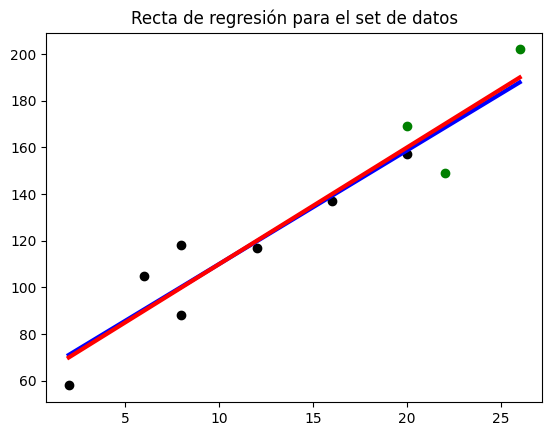

In [ ]:
#Función para calcular los coeficientes de la recta de regresión
def calcRegLinCoeff(x,y):
  n = len(y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x*y)
  sum_x2 = np.sum(x**2)
  b1 = (sum_xy - sum_x*sum_y/n)/(sum_x2-sum_x**2/n)
  b0 = np.mean(y) - b1*np.mean(x)
  return b1, b0

#Función para devolver targets a través de los coeficientes de la recta de regresión
def calcRegLinY(b1,b0,x):
  return x*b1 + b0

#Calculo de los targets
b1,b0 = calcRegLinCoeff(X.T,y)
y_calc_test = calcRegLinY(b1,b0,X_test)
plt.title("Recta de regresión en el intervale del set de test")
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_test, color="blue", linewidth=3)
plt.plot(X_test, y_calc_test, color="red", linewidth=3)
plt.show()

#Calculo de los targets para todo el set de datos
y_calc_all = calcRegLinY(b1,b0,X)
plt.title("Recta de regresión para el set de datos")
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="green")
plt.plot(X, y_pred_all, color="blue", linewidth=3)
plt.plot(X, y_calc_all, color="red", linewidth=3)
plt.show()









3.   Calcula los coeficientes de determinación r2 y r.

In [ ]:
def calcDetCoeff(y,y_calc):

  sct = np.sum((y-np.mean(y))**2)
  scr = np.sum((y_calc-np.mean(y))**2)
  r2 = scr/sct
  return r2

r2 = calcDetCoeff(y,y_calc_all.T)
r = np.sqrt(r2)*np.sign(b1)

print("r\u00b2:", r2)
print("r:", r)

r²: 0.9027336300063573
r: 0.9501229552044079
